# Simple Linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Documents\Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
df.head(12)


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
x=df.iloc[:,:-1]
y=df.iloc[:,1]
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [5]:
y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64

# model_selection

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# predict

In [8]:
y_pred=model.predict(x_test)

In [9]:
print("Intercept",model.intercept_)
print("Cofficient",model.coef_)

Intercept 27442.12204843237
Cofficient [9154.337251]


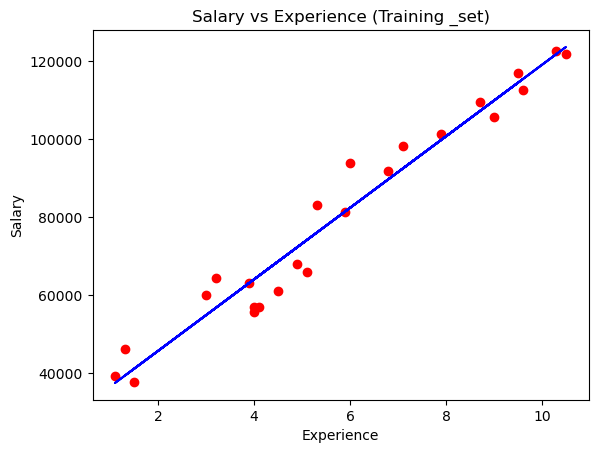

In [10]:
# visualize the data in training set
plt.scatter(x_train,y_train,c='r')
plt.plot(x_train,model.predict(x_train),c='b')
plt.title('Salary vs Experience (Training _set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

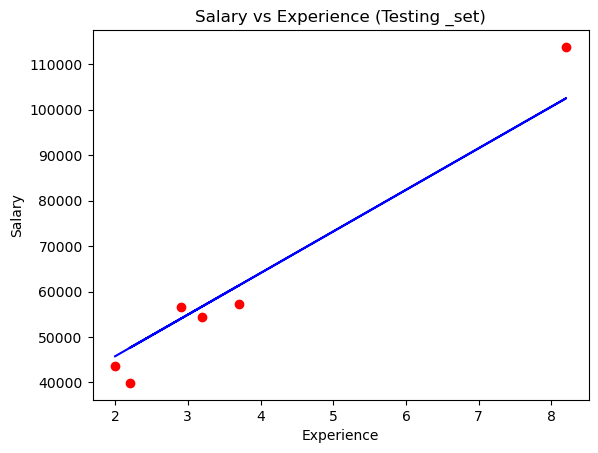

In [11]:
# visualize the plot in testset
plt.scatter(x_test,y_test,c='r')
plt.plot(x_test,model.predict(x_test),c='b')
plt.title('Salary vs Experience (Testing _set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

# calculation of mean squared error

In [12]:

from sklearn.metrics import mean_squared_error
print("MSE FOR TRAIN DATA",mean_squared_error(y_train,model.predict(x_train)))
print("MSE FOR TEST DATA",mean_squared_error(y_test,y_pred))

MSE FOR TRAIN DATA 30731157.161052775
MSE FOR TEST DATA 36863353.79956883


# calculation of RMSE VALUES

In [13]:
print("RMSE FOR TEST",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE FOR TEST 6071.519892050823


# calculating R2

In [14]:
print("Train R2",model.score(x_train,y_train))

Train R2 0.9552231515702403


# cross validation
##### it must<=5 to  accuracy score
##### low =underfit
##### high=>overfit 

In [19]:
score = cross_val_score(model, x, y, cv=5)
print(score)
print("Cross Validation Score:", score.mean())


[ 0.3595933  -1.24422823  0.25052696  0.29699762  0.07028896]
Cross Validation Score: -0.05336427684509604


# save the Model

In [23]:
import pickle  # ✅ Required to use pickle

filename = 'linear_regression_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print("Model has been pickled and saved as linear_regression_model.pkl")


Model has been pickled and saved as linear_regression_model.pkl


#### Path

In [25]:
import os

filename = 'linear_regression_model.pkl'
full_path = os.path.abspath(filename)
print("Model saved at:", full_path)


Model saved at: C:\Users\hp\Data Science class\linear_regression_model.pkl


# Run the app the model save it 

In [26]:
import streamlit as st
import pickle
import numpy as np

In [31]:
# aceessing the saved file in read mode
model=pickle.load(open(r'C:\Users\hp\Data Science class\linear_regression_model.pkl','rb'))


st.title("Salary Prediction App")# add the title of the stramlit APP


# Add a brief description
st.write("This app predicts the salary based on years of experience using a simple linear regression model.")
# Add a brief description
st.write("This app predicts the salary based on years of experience using a simple linear regression model.")

# Add input widget for user to enter years of experience
years_experience = st.number_input("Enter Years of Experience:", min_value=0.0, max_value=50.0, value=1.0, step=0.5)

# When the button is clicked, make predictions
if st.button("Predict Salary"):
    # Make a prediction using the trained model
    experience_input = np.array([[years_experience]])  # Convert the input to a 2D array for prediction
    prediction = model.predict(experience_input)
    
    # Display the result
    st.success(f"The predicted salary for {years_experience} years of experience is: ${prediction[0]:,.2f}")
    
# Display information about the model
st.write("The model was trained using a dataset of salaries and years of experience.")



2025-07-09 23:18:52.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 23:18:52.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 23:18:52.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 23:18:52.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 23:18:52.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 23:18:52.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 23:18:52.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 23:18:52.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar